In [177]:
import pandas as pd
import numpy as np
from pymysql import connect
import os
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler



# Obtener la dirección del directorio actual
current_dir = os.getcwd()

# Obtener la dirección del directorio padre
parent_dir = os.path.dirname(current_dir)

#Creamos direccion a la carpeta de credenciales
path_credenciales = os.path.join(parent_dir,'Credenciales_folder')

#Añadimos a las direcciones el path de las credenciales
sys.path.append(path_credenciales)

from credenciales_bdd import Credenciales


dl_economico = Credenciales('datalake_economico')
dwh_economico = Credenciales('dwh_economico')
dl_socio = Credenciales('datalake_sociodemografico')


In [178]:
#Conexion al DATALAKE ECONOMICO
conn_dl_economico = connect(user=dl_economico.user,password=dl_economico.password,database=dl_economico.database,
               host=dl_economico.host)
cursor_dl_economico = conn_dl_economico.cursor()

#Conexion al DWH ECONOMICO
conn_dwh = connect(user=dwh_economico.user,password=dwh_economico.password,database=dwh_economico.database,
               host=dwh_economico.host)
cursor_dwh = conn_dwh.cursor()

#Conexion al DATALAKE sociodemografico
conn_dl_socio = connect(user=dl_socio.user,password=dl_socio.password,database=dl_socio.database,
               host=dl_socio.host)
cursor_dl_socio = conn_dl_socio.cursor()

In [179]:
df_deflactado = pd.read_sql('SELECT * FROM supermercado_deflactado',conn_dwh)
fecha_max = df_deflactado['fecha'].max()
fecha_min = df_deflactado['fecha'].min()
df_deflactado

/tmp/ipykernel_3308/3728799888.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_deflactado = pd.read_sql('SELECT * FROM supermercado_deflactado',conn_dwh)


,fecha,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronica_hogar,otros
0,2017-01-01,2,6,6.278642e+06,847931.856657,1.353655e+06,226734.766263,706111.962222,469392.019866,177662.631746,91038.477409,993618.382735,193155.296873,519954.247619,700232.267330
1,2017-02-01,2,6,5.778643e+06,813672.439215,1.345861e+06,226148.377153,691166.930547,488108.622824,172801.025848,89127.789805,902511.136277,151197.719689,369253.083312,586157.562242
2,2017-03-01,2,6,6.045451e+06,801837.490175,1.511483e+06,251260.379741,748838.241312,516708.733158,172686.040993,94211.449652,959431.655238,139070.199331,356051.503867,541963.761508
3,2017-04-01,2,6,6.341997e+06,767654.809282,1.685587e+06,285611.550643,737310.462677,567468.542118,165538.828042,97638.374621,977918.914405,187352.716059,442885.131821,505866.208270
4,2017-05-01,2,6,5.962564e+06,669492.516680,1.556599e+06,247883.461304,707910.295541,503281.362912,154113.417066,87076.984080,916544.922092,204087.031264,501471.369568,483930.490211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,2023-11-01,7,94,3.277681e+05,37778.263389,8.609735e+04,6103.644576,17963.795564,33747.947523,39218.441860,NaN,41355.691029,11420.021896,NaN,22698.252649
2171,2023-12-01,7,94,3.965303e+05,55213.285783,9.785393e+04,6583.235370,18790.172522,45373.185314,46179.050806,NaN,49626.794773,12366.179734,NaN,29636.465713
2172,2024-01-01,7,94,2.834070e+05,30057.733025,6.971892e+04,5208.240004,15535.927028,26880.098539,37361.526580,NaN,37390.816158,6592.090288,NaN,17850.388831
2173,2024-02-01,7,94,2.855477e+05,29166.036311,7.104059e+04,5150.040151,15566.632290,29925.202810,37966.886036,NaN,33708.858072,7170.110806,NaN,19720.138833


In [180]:
df_cb = pd.read_sql(f"SELECT * FROM cbt_cba WHERE fecha BETWEEN '{fecha_min}' AND '{fecha_max}'",conn_dl_socio)

/tmp/ipykernel_3308/3437299414.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cb = pd.read_sql(f"SELECT * FROM cbt_cba WHERE fecha BETWEEN '{fecha_min}' AND '{fecha_max}'",conn_dl_socio)


In [181]:
datos_nea = df_deflactado[df_deflactado['id_provincia_indec'].isin([18,22,30,34,54])]

<h1> Exploracion de datos del NEA </h1>

<hr>
Idea principal: predecir a futuro las ventas de supermercados del NEA en cada una de sus provincias
<hr>
<hr>
Herramienta principal a utilizar: bibliotecas de forecasting y regresiones lineales
<hr>
<p>Otras cuestiones:</p>
<ol>
  <li>Existe relacion con CBA y CBT?</li>
  <li>Conexion con la inflacion que presento en NEA historicamente</li>
</ol>

Observamos movimiento del total de facturacion de cada provincia, y le añadimos el valor del CBT y CBA SIN DEFLACTAR

<H1> Primera parte, analisis de datos absolutos del supermercado del NEA y de CBT y CBA del NEA </H1>

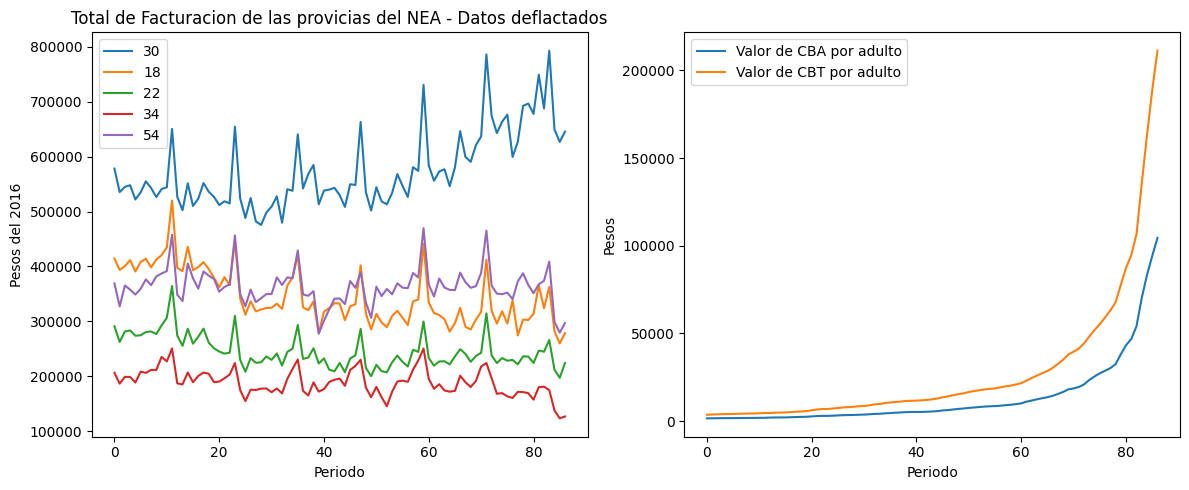

In [182]:
largo = np.arange(0,len(df_deflactado['total_facturacion'][df_deflactado['id_provincia_indec'] == 18])) 
lista_ids = datos_nea['id_provincia_indec'].unique()

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for id in lista_ids:

    axes[0].plot(largo,df_deflactado['total_facturacion'][df_deflactado['id_provincia_indec'] == id],label = id)
    

axes[0].set_title("Total de Facturacion de las provicias del NEA - Datos deflactados")
axes[0].set_xlabel("Periodo")
axes[0].legend()
axes[0].set_ylabel("Pesos del 2016")


axes[1].plot(df_cb['cba_nea'],label = "Valor de CBA por adulto")
axes[1].plot(df_cb['cbt_nea'],label = "Valor de CBT por adulto")
axes[1].legend()
axes[1].set_xlabel("Periodo")
axes[1].set_ylabel("Pesos")

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


dato no util, probaremos estandarizar las variables
<hr>
En este caso, falta deflactar los datos de cba y cbt del nea

Deflactamos los datos de CBA y CBT - Utilizamos los valores a nivel GENERAL

In [183]:
query = f""" SELECT id_subdivision,valor FROM ipc_valores WHERE id_region = 5 AND
   id_subdivision IN (1,3) AND
   fecha BETWEEN '{fecha_min}' and '{fecha_max}'"""
datos_ipc_nea = pd.read_sql(query,conn_dl_economico)
datos_ipc_nea

/tmp/ipykernel_3308/1669444090.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datos_ipc_nea = pd.read_sql(query,conn_dl_economico)


,id_subdivision,valor
0,1,101.6727
1,1,103.4617
2,1,105.9880
3,1,108.3473
4,1,110.4331
...,...,...
169,3,3368.0341
170,3,4426.1326
171,3,5193.4592
172,3,5618.2768


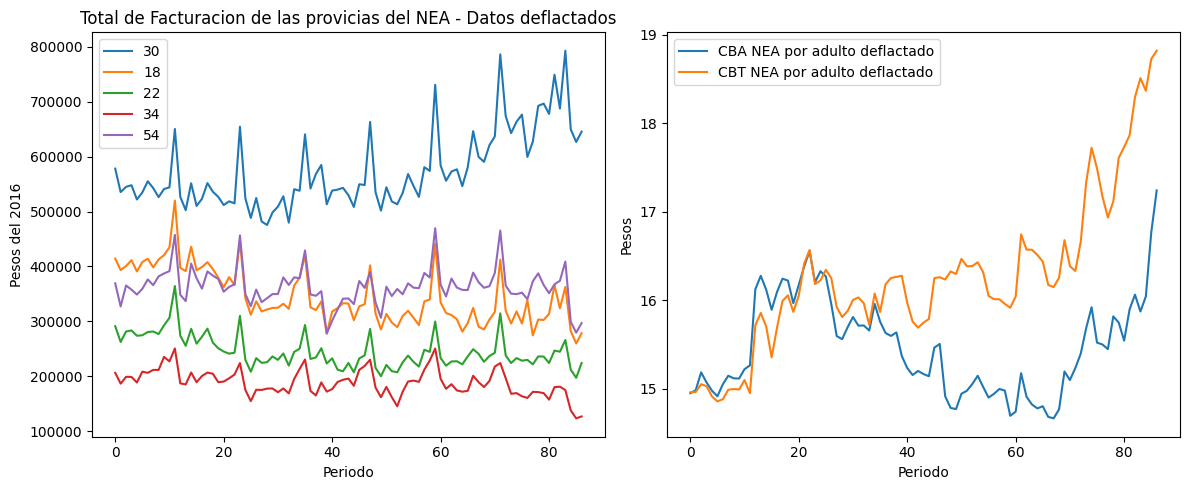

In [184]:
df_cb['cba_nea_deflactado'] = df_cb['cba_nea'] / datos_ipc_nea['valor'][datos_ipc_nea['id_subdivision'] == 3].values
df_cb['cbt_nea_deflactado'] = df_cb['cba_nea'] / datos_ipc_nea['valor'][datos_ipc_nea['id_subdivision'] == 1].values

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for id in lista_ids:

    axes[0].plot(largo,df_deflactado['total_facturacion'][df_deflactado['id_provincia_indec'] == id],label = id)
    

axes[0].set_title("Total de Facturacion de las provicias del NEA - Datos deflactados")
axes[0].set_xlabel("Periodo")
axes[0].legend()
axes[0].set_ylabel("Pesos del 2016")


axes[1].plot(df_cb['cba_nea_deflactado'],label = "CBA NEA por adulto deflactado")
axes[1].plot(df_cb['cbt_nea_deflactado'],label = "CBT NEA por adulto deflactado")
axes[1].legend()
axes[1].set_xlabel("Periodo")
axes[1].set_ylabel("Pesos")

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

<H1> Analisis de las variaciones mensuales  </H1>
<hr>
Buscamos establecer algun tipo de relacion entre las variaciones del supermercado del NEA y de CBT y CBA

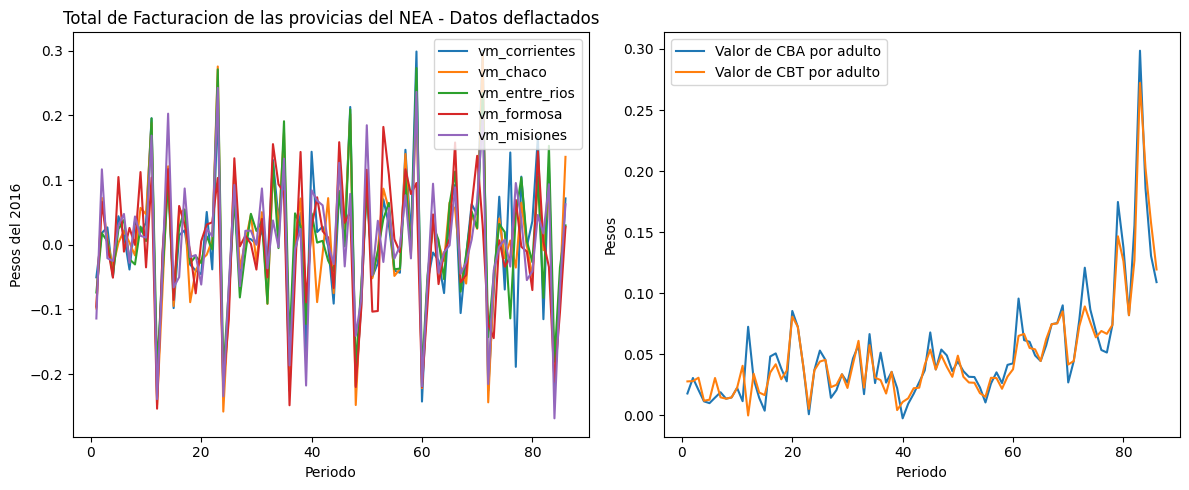

In [206]:
variaciones = pd.DataFrame()
variaciones['vm_corrientes'] = list(datos_nea['total_facturacion'][datos_nea['id_provincia_indec'] == 18].pct_change())
variaciones['vm_chaco'] = list(datos_nea['total_facturacion'][datos_nea['id_provincia_indec'] == 22].pct_change())
variaciones['vm_entre_rios'] = list(datos_nea['total_facturacion'][datos_nea['id_provincia_indec'] == 30].pct_change())
variaciones['vm_formosa'] = list(datos_nea['total_facturacion'][datos_nea['id_provincia_indec'] == 34].pct_change())
variaciones['vm_misiones'] = list(datos_nea['total_facturacion'][datos_nea['id_provincia_indec'] == 54].pct_change())
variaciones['vm_cba_nea'] = list(df_cb['cba_nea'].pct_change())
variaciones['vm_cbt_nea'] = list(df_cb['cbt_nea'].pct_change())

columnas_variaciones_provincias = list(variaciones.columns)
columnas_variaciones_provincias.remove('vm_cba_nea')
columnas_variaciones_provincias.remove('vm_cbt_nea')

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for columna in columnas_variaciones_provincias:

    axes[0].plot(variaciones[columna],label = columna)
    

axes[0].set_title("Total de Facturacion de las provicias del NEA - Datos deflactados")
axes[0].set_xlabel("Periodo")
axes[0].legend()
axes[0].set_ylabel("Pesos del 2016")


axes[1].plot(variaciones['vm_cba_nea'],label = "Valor de CBA por adulto")
axes[1].plot(variaciones['vm_cbt_nea'],label = "Valor de CBT por adulto")
axes[1].legend()
axes[1].set_xlabel("Periodo")
axes[1].set_ylabel("Pesos")

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Movimientos de las distintas ventas

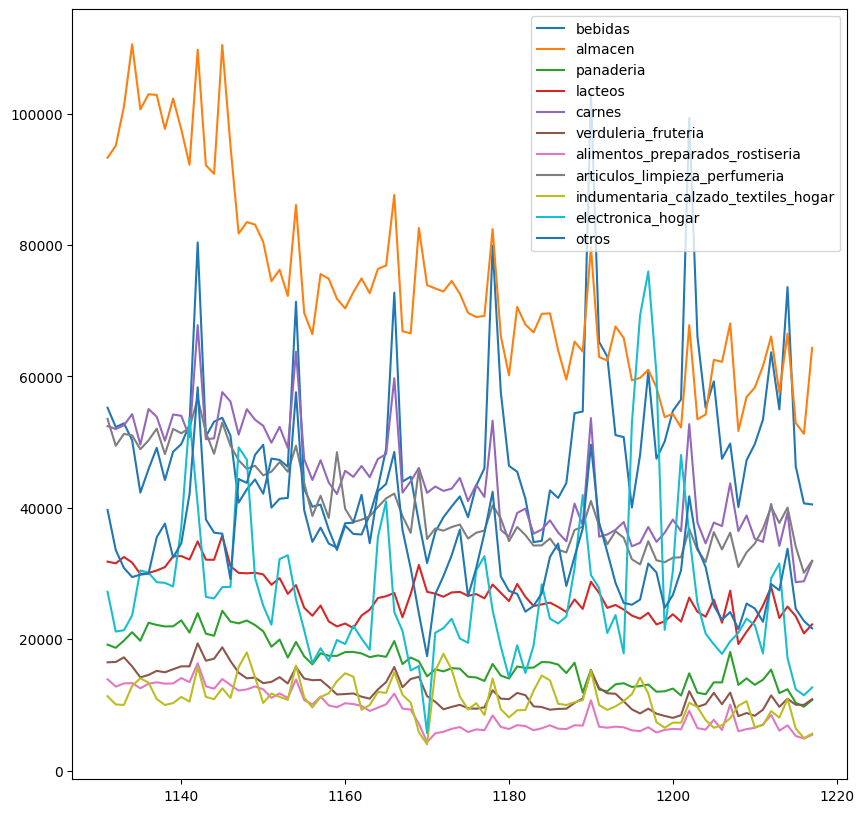

In [186]:
columnas = list(datos_nea.columns)
columnas.remove('total_facturacion')
columnas.remove('id_region_indec')
columnas.remove('id_provincia_indec')
columnas.remove('fecha')



plt.figure(figsize=(10,10))
for columna in columnas:

    id_base = 18 #--> Corrientes
    plt.plot(datos_nea[columna][datos_nea['id_provincia_indec'] == id_base],label = columna)

plt.legend()
plt.show()

Correlaccion de movimientos

In [187]:
mtz_corr = datos_nea[columnas][datos_nea['id_provincia_indec'] == id_base].corr()
mtz_corr

,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronica_hogar,otros
bebidas,1.000000,0.090051,-0.050428,0.216391,0.281455,0.238244,0.173422,0.131511,0.092182,0.208988,0.407214
almacen,0.090051,1.000000,0.885971,0.872745,0.864001,0.871805,0.862011,0.915574,0.447781,0.072467,0.458042
panaderia,-0.050428,0.885971,1.000000,0.783183,0.877332,0.823427,0.911183,0.876839,0.533410,0.108724,0.558533
lacteos,0.216391,0.872745,0.783183,1.000000,0.768189,0.824574,0.741742,0.843077,0.302377,0.116789,0.415359
carnes,0.281455,0.864001,0.877332,0.768189,1.000000,0.849995,0.896227,0.859076,0.550704,0.126684,0.727362
verduleria_fruteria,0.238244,0.871805,0.823427,0.824574,0.849995,1.000000,0.907561,0.905656,0.337806,0.022451,0.572430
alimentos_preparados_rostiseria,0.173422,0.862011,0.911183,0.741742,0.896227,0.907561,1.000000,0.923708,0.451742,0.155326,0.660681
articulos_limpieza_perfumeria,0.131511,0.915574,0.876839,0.843077,0.859076,0.905656,0.923708,1.000000,0.404216,0.111353,0.557512
indumentaria_calzado_textiles_hogar,0.092182,0.447781,0.533410,0.302377,0.550704,0.337806,0.451742,0.404216,1.000000,0.302469,0.585267
electronica_hogar,0.208988,0.072467,0.108724,0.116789,0.126684,0.022451,0.155326,0.111353,0.302469,1.000000,0.277400


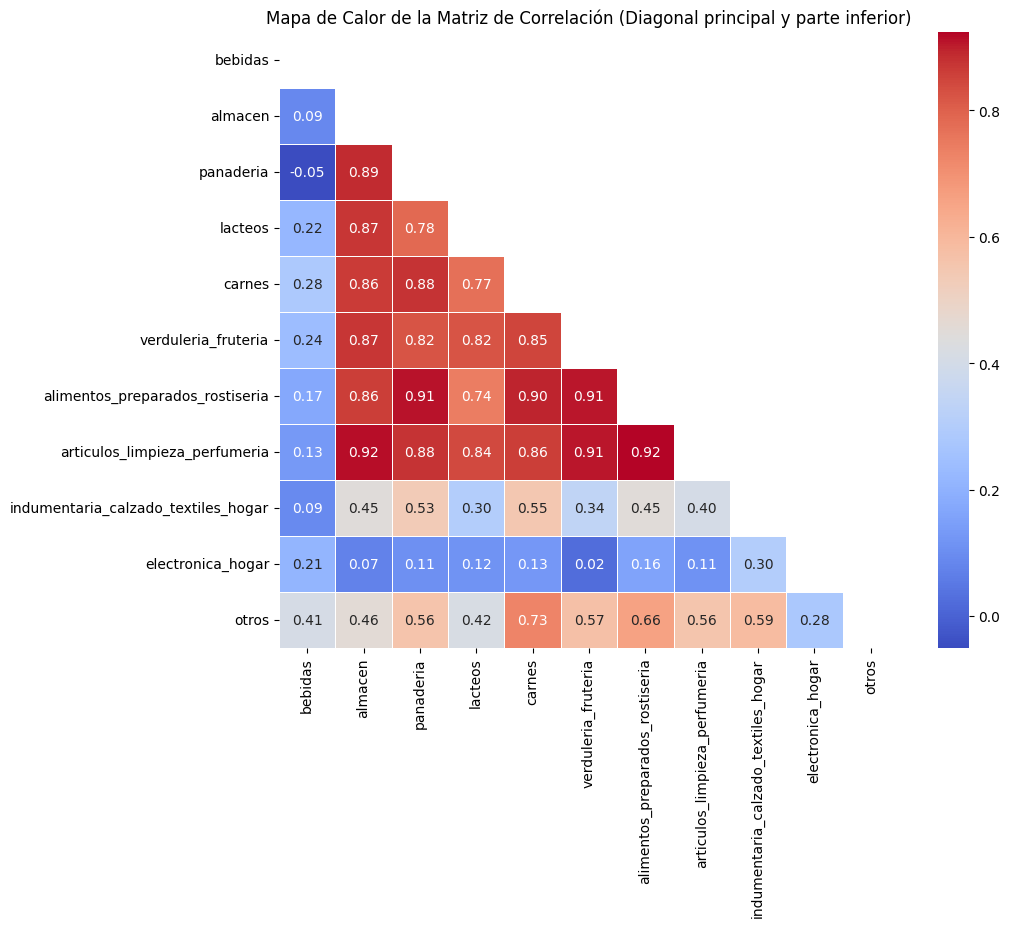

In [188]:
# Generar una máscara para ocultar la parte superior de la matriz
mask = np.triu(np.ones_like(mtz_corr, dtype=bool))

# Crear el mapa de calor con la máscara
plt.figure(figsize=(10, 8))
sns.heatmap(mtz_corr, mask=mask, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Mapa de Calor de la Matriz de Correlación (Diagonal principal y parte inferior)')
plt.show()

Creacion de una regresion lineal multiple

In [189]:
#modelo de regresion lineal
X = datos_nea[datos_nea['id_provincia_indec'] == id_base].drop(['total_facturacion','id_region_indec','id_provincia_indec','fecha'],axis=1)
Y = datos_nea['total_facturacion'][datos_nea['id_provincia_indec'] == id_base]

# Ajustar el modelo de regresión
model = sm.OLS(Y, X).fit()

# Obtener el resumen del modelo
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:      total_facturacion   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.769e+04
Date:                Mon, 24 Jun 2024   Prob (F-statistic):                   1.01e-124
Time:                        12:36:32   Log-Likelihood:                         -892.48
No. Observations:                  87   AIC:                                      1807.
Df Residuals:                      76   BIC:                                      1834.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------